In [1]:
import pandas as pd
import numpy as np
from numpy import absolute
import matplotlib.pyplot as plt
import ta
import sklearn
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


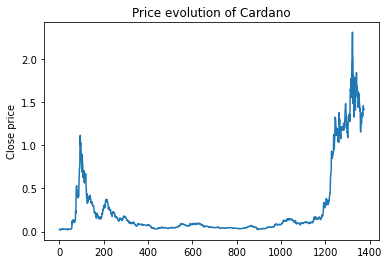

In [2]:
# load data 

Cardano = pd.read_csv("/Users/nicolaspaganel/Desktop/GitHub/ML_Finance/Crypto df/coin_Cardano.csv") 

# let's have a look at the data
plt.plot(Cardano["Close"])
plt.ylabel("Close price")
Crypto_name = Cardano["Name"][0]
plt.title("Price evolution of " + Crypto_name)
Cardano.head()

In [3]:
# Clean nan values

Cardano = ta.utils.dropna(Cardano)

# Add all technical analysis features filling nans values

Cardano = ta.add_all_ta_features(Cardano, "Open", "High", "Low", "Close", "Volume", fillna=True)

#print(Cardano.columns)

/opt/anaconda3/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/anaconda3/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [4]:
# List of our indicators 

indicators = ['volume_adi', 'volume_obv', 'volume_cmf',
       'volume_fi', 'volume_mfi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_nvi', 'volume_vwap', 'volatility_atr', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_ui', 'trend_macd', 'trend_macd_signal', 'trend_macd_diff',
       'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base', 'trend_ichimoku_a', 'trend_ichimoku_b',
       'trend_visual_ichimoku_a', 'trend_visual_ichimoku_b', 'trend_aroon_up',
       'trend_aroon_down', 'trend_aroon_ind', 'trend_psar_up',
       'trend_psar_down', 'trend_psar_up_indicator',
       'trend_psar_down_indicator', 'trend_stc', 'momentum_rsi',
       'momentum_stoch_rsi', 'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d',
       'momentum_tsi', 'momentum_uo', 'momentum_stoch',
       'momentum_stoch_signal', 'momentum_wr', 'momentum_ao', 'momentum_kama',
       'momentum_roc', 'momentum_ppo', 'momentum_ppo_signal',
       'momentum_ppo_hist', 'others_cr']

In [5]:
# 'others_dr', 'others_dlr', between 'momentum_ppo_hist' and 'others_cr'

In [6]:
# compute the returns 

Cardano["Returns"] = Cardano["Close"].pct_change()

# keep only the relevant columns, ie. the ta indicators and the returns. 

Cardano = Cardano[indicators].join(Cardano["Returns"]).drop(0) #drop the first row as return = NaN

Cardano

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,...,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_cr,Returns
1,-6.070702e+06,4.064350e+07,-0.081334,-8.696073e+04,0.000000,-0.000038,-0.000038,-5.516302e+07,802.713311,0.024794,...,33.646631,-91.634039,0.000000,0.023924,0.000000,-5.934792,-1.186958,-4.747833,-19.728669,-0.197287
2,-5.178208e+06,4.964355e+07,-0.061911,-7.310329e+04,0.000000,-0.000048,-0.000043,-2.871049e+06,845.737644,0.024479,...,28.895217,-80.607609,0.000000,0.023097,0.000000,-12.455387,-3.440644,-9.014743,-15.426236,0.053599
3,-5.330769e+06,4.408104e+07,-0.059761,-6.301183e+04,0.000000,-0.000008,-0.000031,3.700827e+05,828.662115,0.024293,...,14.258188,-84.983787,0.000000,0.022416,0.000000,-18.898524,-6.532220,-12.366304,-17.133788,-0.020190
4,-1.223418e+07,3.630033e+07,-0.126149,-5.728871e+04,0.000000,-0.000064,-0.000039,-1.180310e+06,828.662115,0.023907,...,11.979427,-98.470322,0.000000,0.020876,0.000000,-24.170970,-10.059970,-14.111000,-28.508237,-0.137263
5,-5.295668e+06,4.371157e+07,-0.050728,-4.656170e+04,14.641568,-0.000028,-0.000037,-1.078525e+05,936.017905,0.023620,...,14.393974,-73.363969,-0.000615,0.020903,0.000000,-28.900125,-13.828001,-15.072124,-19.246254,0.129553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,1.489636e+11,1.606680e+11,0.079485,7.715935e+06,40.803677,-0.000017,-0.000039,2.578090e+07,1.340988,1.287375,...,74.826267,-14.425005,-0.130026,1.413802,-2.434291,-14.631161,-12.570468,-2.060693,5277.170314,0.044014
1370,1.492675e+11,1.626961e+11,0.048280,1.021755e+07,45.608411,0.000243,-0.000017,1.131361e+08,1.352951,1.287734,...,80.572709,-11.705474,-0.111837,1.413342,19.478555,-15.794977,-13.215370,-2.579607,5325.137984,0.008921
1371,1.499232e+11,1.645025e+11,0.034713,2.200846e+07,50.762187,0.000230,0.000013,8.402275e+07,1.402332,1.288290,...,88.876266,-7.240723,-0.092363,1.415273,26.440825,-17.309043,-14.034104,-3.274938,5523.151544,0.036499
1372,1.492638e+11,1.627430e+11,-0.003602,5.470805e+06,53.162599,-0.000082,0.000046,1.635093e+06,1.351087,1.296258,...,87.651515,-18.099257,-0.068013,1.414355,12.132075,-18.599922,-14.947268,-3.652654,5317.665228,-0.036543


In [7]:
# look at the correlations between the features and the returns

pd.set_option("display.max_columns", len(indicators))
pd.DataFrame(np.corrcoef(Cardano, rowvar=False))

# if a coefficient is > 0.9 , drop it

#######                     #######
####### CODE GENERALIZATION #######
#######                     #######


#(so far, we did it manually, not good)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,1.000000,0.991616,0.137211,0.272162,-0.001385,0.000883,-0.005073,0.161555,-0.188130,0.923399,0.817586,0.924717,0.902218,0.929065,-0.006289,0.079096,0.037910,-0.058878,0.925689,0.916859,0.932401,0.189943,0.068387,0.000361,-0.111815,0.928647,0.892273,0.915440,0.065638,0.108867,-0.033242,0.355004,0.409372,-0.099374,0.925770,0.922350,0.927924,0.926570,-0.043864,0.000824,...,-0.059443,0.091781,0.143903,0.120853,0.076848,-0.053378,0.037928,0.049532,-0.047097,0.922328,0.910466,0.918758,0.889791,0.859098,0.812215,0.090722,-0.137415,0.127765,0.895907,0.908963,-0.002297,-0.008720,-0.078584,0.165275,-0.004822,-0.006526,-0.008129,0.216467,0.149050,0.111505,0.117746,0.111505,0.259194,0.919366,0.020284,-0.006807,0.010725,-0.040082,0.923848,0.015572
1,0.991616,1.000000,0.143177,0.288398,0.026797,0.001537,0.000413,0.182157,-0.174099,0.928693,0.825633,0.928212,0.907849,0.929031,0.004620,0.094202,0.061432,-0.061628,0.931037,0.923114,0.936538,0.199662,0.083071,0.016138,-0.113159,0.932246,0.898686,0.920931,0.076211,0.119081,-0.036323,0.359782,0.400995,-0.056961,0.930804,0.925660,0.933768,0.932154,-0.037365,0.011869,...,-0.074730,0.104898,0.142283,0.118771,0.092522,-0.063569,0.039312,0.047508,-0.032725,0.928635,0.916397,0.924892,0.900214,0.871671,0.824663,0.099649,-0.138994,0.133686,0.898568,0.910593,-0.003729,-0.012503,-0.063454,0.173674,0.013634,0.013429,0.011753,0.214412,0.157682,0.123664,0.130524,0.123664,0.269463,0.925087,0.034636,0.002200,0.011532,-0.019748,0.933497,0.022876
2,0.137211,0.143177,1.000000,0.205898,0.631143,0.065272,0.158278,0.178089,0.023198,0.118190,0.178131,0.084890,0.132067,0.006693,0.291675,0.643652,0.354215,-0.198809,0.121766,0.134685,0.104261,0.243983,0.572973,0.456803,-0.383653,0.025583,0.128859,0.093765,0.288092,0.713369,-0.472395,0.444279,0.396626,0.240121,0.117663,0.063297,0.119983,0.080415,0.271180,0.661179,...,-0.606498,0.694681,0.561668,0.453935,0.623906,-0.128848,0.437287,0.392812,0.205564,0.130137,0.079897,0.105272,0.059864,-0.039796,-0.048290,0.613626,-0.597999,0.679578,0.097725,0.071701,0.004300,-0.008998,0.415154,0.761574,0.224603,0.242235,0.254723,0.701723,0.773482,0.630210,0.653835,0.630210,0.437311,0.132801,0.472011,0.550493,0.552061,0.146507,0.166842,0.265361
3,0.272162,0.288398,0.205898,1.000000,0.158534,0.072426,0.127015,0.649043,-0.041502,0.219480,0.140171,0.188016,0.215105,0.138363,0.125198,0.246977,0.241013,-0.044858,0.225691,0.217476,0.235245,0.070606,0.212819,0.217332,-0.112629,0.197687,0.217340,0.212884,0.120984,0.220524,-0.152161,0.493420,0.351791,0.546137,0.218068,0.173856,0.234176,0.193902,0.060050,0.218530,...,-0.191045,0.207756,0.178017,0.111872,0.236387,-0.254530,0.108451,0.093845,0.065995,0.258623,0.188868,0.224301,0.158615,0.114121,0.084665,0.179137,-0.128980,0.172997,0.137259,0.101103,0.024886,-0.050957,0.157631,0.281940,0.160430,0.149714,0.128060,0.229784,0.203014,0.218121,0.213223,0.218121,0.467322,0.225637,0.205292,0.134625,0.097358,0.117925,0.332831,0.146707
4,-0.001385,0.026797,0.631143,0.158534,1.000000,0.062934,0.269490,0.148458,0.122802,-0.003668,0.022963,-0.040120,-0.009406,-0.087773,0.297207,0.772744,0.442058,-0.197077,0.000851,0.007714,-0.008117,0.188365,0.651756,0.514087,-0.404487,-0.060297,-0.001210,-0.022152,0.300022,0.776434,-0.484524,0.363505,0.269767,0.368944,-0.006248,-0.054841,-0.000686,-0.036656,0.191676,0.763723,...,-0.758797,0.891408,0.465269,0.353762,0.763807,-0.220948,0.377306,0.288109,0.390790,0.015903,-0.032827,-0.008500,-0.053551,-0.116727,-0.131126,0.620744,-0.558948,0.661848,-0.020469,-0.055702,-0.028379,0.002145,0.656401,0.786905,0.436697,0.529047,0.570880,0.628818,0.657315,0.737902,0.804068,0.737902,0.389050,0.005046,0.610914,0.521831,0.428455,0.345720,0.051843,0.222746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [8]:
# split into train and test sets

Cardano_train, Cardano_test = train_test_split(Cardano,train_size = 0.80,random_state=None, shuffle=False)

In [9]:
# standardize

sc = StandardScaler()
Z_Cardano_train = sc.fit_transform(Cardano_train)

In [10]:
# Lasso regression (alpha = 1.0)

from sklearn.linear_model import Lasso
regLasso1 = Lasso(fit_intercept=False,normalize=False, max_iter=1000)
#print(regLasso1)

In [11]:
# Rename for clarity 
# We use Features from t=0 to t=T-1 to predict Returns from t=1 to t=T, where T is the final observation date

X,y = pd.DataFrame(Z_Cardano_train[:-1,:-1]),pd.DataFrame(Z_Cardano_train[1:,-1:])

In [12]:
# fit

regLasso1.fit(X,y)

Lasso(fit_intercept=False)

In [13]:
# obtain coeffficients of the LASSO regression for multiple alphas

from sklearn.linear_model import lasso_path
alpha_for_path, coefs_lasso, _ = lasso_path(X,y,n_alphas=500)#,alphas=my_alphas)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:517: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24519039807387344, tolerance: 0.10924551763214954
  model = cd_fast.enet_coordinate_descent_multi_task(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:517: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3158954663642817, tolerance: 0.10924551763214954
  model = cd_fast.enet_coordinate_descent_multi_task(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:517: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3115423223838434, tolerance: 0.10924551763214954
  model = cd_fast.enet_coordinate_descent_multi_task(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:517: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.955001649059227, tolerance: 0.10924551763214954
  model = cd_fast.enet_coordinate_descent_multi_task(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:517: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0419709550898233, tolerance: 0.10924551763214954
  model = cd_fast.enet_coordinate_descent_multi_task(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:517: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4448452874526083, tolerance: 0.10924551763214954
  model = cd_fast.enet_coordinate_descent_multi_task(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coo

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:517: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2286777368270805, tolerance: 0.10924551763214954
  model = cd_fast.enet_coordinate_descent_multi_task(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:517: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.122414584078115, tolerance: 0.10924551763214954
  model = cd_fast.enet_coordinate_descent_multi_task(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:517: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.02025444788444, tolerance: 0.10924551763214954
  model = cd_fast.enet_coordinate_descent_multi_task(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coord

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:517: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.731651993027299, tolerance: 0.10924551763214954
  model = cd_fast.enet_coordinate_descent_multi_task(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:517: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.838230516704925, tolerance: 0.10924551763214954
  model = cd_fast.enet_coordinate_descent_multi_task(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:517: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.538270472608474, tolerance: 0.10924551763214954
  model = cd_fast.enet_coordinate_descent_multi_task(


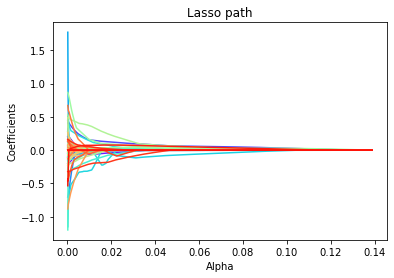

In [14]:
# graph of lasso path (coefficients given alpha)
import matplotlib.cm as cm
couleurs = cm.rainbow(np.linspace(0,1,83))
for i in range(coefs_lasso.shape[1]):
    plt.plot(alpha_for_path,coefs_lasso[0][i,:],c=couleurs[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()

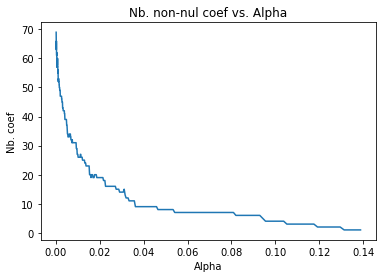

In [15]:
# number of non-nul coefficients for each alpha

nbNonZero = np.apply_along_axis(func1d=np.count_nonzero,arr=coefs_lasso[0],axis=0)
alphas_nnz_df = pd.DataFrame({'alpha':alpha_for_path,'Nb non-zero coefs':nbNonZero})

plt.plot(alpha_for_path,nbNonZero)
plt.xlabel('Alpha')
plt.ylabel('Nb. coef') 
plt.title('Nb. non-nul coef vs. Alpha') 
plt.show()

In [16]:
# get the alpha for which we get 8 selected features (and its index)

alphas_to_get_8_features = alphas_nnz_df.loc[alphas_nnz_df['Nb non-zero coefs'] == 8 ]
higher_alpha_to_get_8_features = alphas_to_get_8_features.max()[0]
index_higher_alpha_to_get_8_features = list(alpha_for_path).index(higher_alpha_to_get_8_features)
#index_higher_alpha_to_get_8_features

In [17]:
# get the 8 selected features coressponding 

coefs_at_higher_alpha_to_get_8_features = coefs_lasso[0][:,index_higher_alpha_to_get_8_features]
index_coefs_at_higher_alpha_to_get_8_features = coefs_at_higher_alpha_to_get_8_features.nonzero()[0]
coefs_lasso[0][:,[index_higher_alpha_to_get_8_features,2]]
selected_features = [indicators[i] for i in index_coefs_at_higher_alpha_to_get_8_features]
selected_features

['volume_nvi',
 'volatility_bbhi',
 'volatility_dcl',
 'trend_adx',
 'trend_cci',
 'trend_dpo',
 'trend_kst_sig',
 'momentum_ppo_hist']